#### (Home credit competition 중심으로)
## 1.B msno 를 사용하여 null data 시각화
---
### 소스 및 데이터는 아래 kaggle을 참조하였습니다. 
* 캐글 주소 : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
* 캐글의 한글 번역은 파파고와 구글을 이용하였습니다.
___

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
app_train = pd.read_csv('d:/Projects/Cp/input/application_train.csv')
app_test = pd.read_csv('d:/Projects/Cp/input/application_test.csv')

### 누락된 데이터 확인

* 숫자형 데이터의 평균값, 중간값 등 데이터의 분포를 나타내는 통계값 확인
* null값이 제외됨

In [3]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### .isnull()함수 
* 누락 데이터의 유무를 True/False로 반환

In [4]:
# 누락 데이터 계산용 함수
def missing_values_table(df):
    
    # 각 데이터의 NULL 갯수 구한 후 컬럼 총 갯수로 나누어 누락된 백분율 계산
    
    mis_val = df.isnull().sum()    
    mis_val_percent = 100 * mis_val / len(df)
    
    # 각 컬럼별 누락된 데이터 갯수와 백분율 병합
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # 0 / 1로 표시되는 컬럼명 변경 및 백분률기준 소숫점 1자리 표시와 내림차순정렬
    mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values', 1 : '% of Total Values'})    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    #총 컬럼수와 누락 데이터가 존재하는 컬럼수 표시
    print('Your selected dataframe has '          + 
          str(df.shape[1])                        + 
          ' columns.\n'
          'There are '                            +
          str(mis_val_table_ren_columns.shape[0]) +
          ' columns that have missing values.'
         )
    
    return mis_val_table_ren_columns    

In [5]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


* #### null data가 있는 열의 컬럼명과 백분율 구하기
* #### http://kaggle-kr.tistory.com/17을 참조하여 연습용 데이터셋에 맞게 수정하였습니다.

In [6]:
# null data가 있는 열만 다시 확인
temp_list = []

for col in app_train.columns:
    if (app_train[col].isnull().sum() != 0):        
        msg = 'column: {:>30}\t Percent of NaN value: {:.8f}%'.format(col, 100 * (app_train[col].isnull().sum() / app_train[col].shape[0]))
        print(msg)
        #null data가 50% 이상인 컬럼만 따로 저장
        if (100 * (app_train[col].isnull().sum() / app_train[col].shape[0]) > 50):
            temp_list.append(col)

column:                    AMT_ANNUITY	 Percent of NaN value: 0.00390230%
column:                AMT_GOODS_PRICE	 Percent of NaN value: 0.09040327%
column:                NAME_TYPE_SUITE	 Percent of NaN value: 0.42014757%
column:                    OWN_CAR_AGE	 Percent of NaN value: 65.99081008%
column:                OCCUPATION_TYPE	 Percent of NaN value: 31.34554536%
column:                CNT_FAM_MEMBERS	 Percent of NaN value: 0.00065038%
column:                   EXT_SOURCE_1	 Percent of NaN value: 56.38107255%
column:                   EXT_SOURCE_2	 Percent of NaN value: 0.21462647%
column:                   EXT_SOURCE_3	 Percent of NaN value: 19.82530706%
column:                 APARTMENTS_AVG	 Percent of NaN value: 50.74972928%
column:               BASEMENTAREA_AVG	 Percent of NaN value: 58.51595553%
column:    YEARS_BEGINEXPLUATATION_AVG	 Percent of NaN value: 48.78101922%
column:                YEARS_BUILD_AVG	 Percent of NaN value: 66.49778382%
column:                 COMMON

In [7]:
temp_train = app_train[temp_list]
temp_train.head()

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,NaN,0.083037,0.0247,0.0369,0.6192,0.0143,0.00,0.0690,0.1250,0.0369,...,0.0690,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,"Stone, brick"
1,NaN,0.311267,0.0959,0.0529,0.7960,0.0605,0.08,0.0345,0.3333,0.0130,...,0.0345,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,Block
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 데이터의 결측값 시각화에 사용할 missingno 라이브러리

import missingno as msno

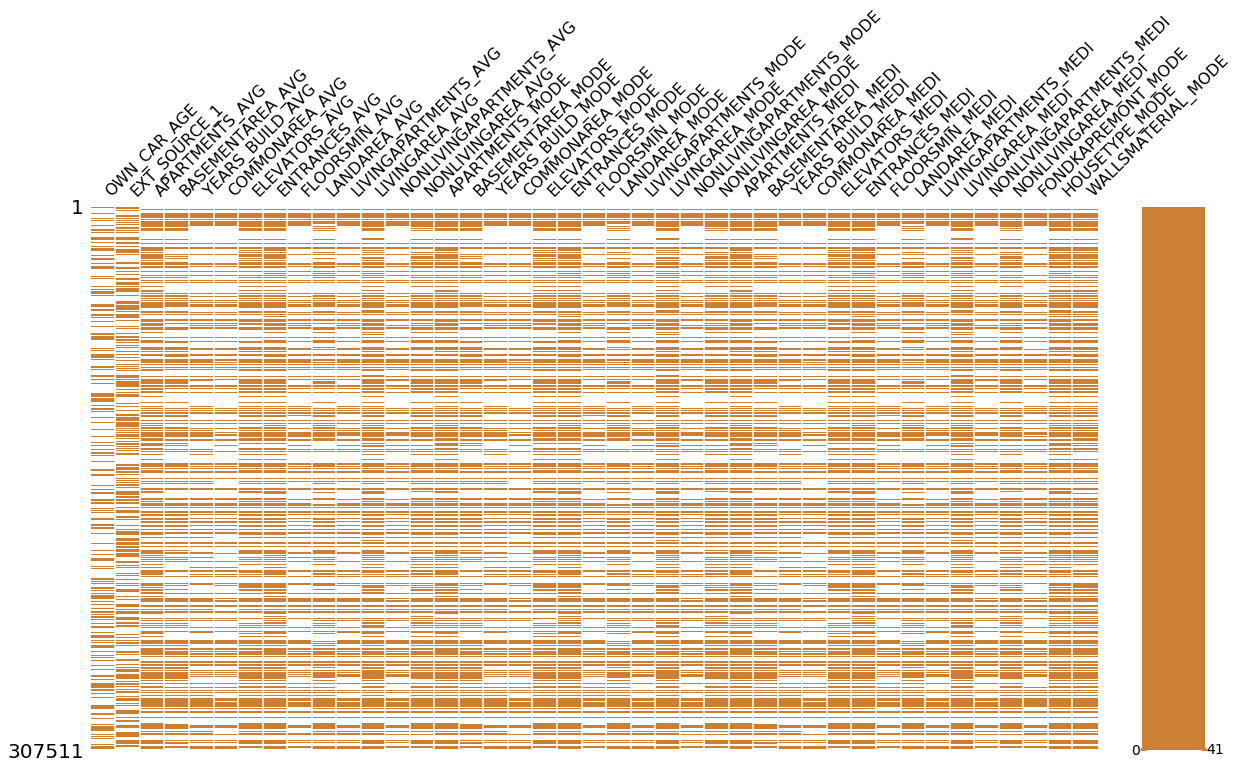

In [9]:
# null data가 50% 이상인 컬럼 시각화
msno.matrix(temp_train, figsize=(20, 10), color=(0.8, 0.5, 0.2))